#  Demo

In [1]:
# standard libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Set custom styles for text color
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'  # Color of the x-axis tick values
plt.rcParams['ytick.color'] = 'white'  # Color of the y-axis tick values

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
target = train.columns.to_list()[-1]
train_target = train[target]

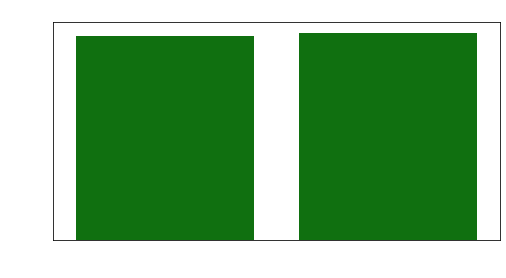

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(data = train, x = target, color='g')
plt.title('Class distribution')
plt.show()

In [8]:
train.drop(target, axis=1, inplace=True)
train_id = train['PassengerId']
test_id = test['PassengerId']

In [9]:
# combine over rows, keeping id for now as group number might be useful
combined = pd.concat([train, test], axis = 0)

### Feature engineering

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [11]:
combined

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [12]:
combined['Group'] = combined['PassengerId'].str[:4]
combined.drop('PassengerId', inplace=True, axis=1)

In [13]:
# categorical columns first
col_cat_NA = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# fill with Group first
for col in col_cat_NA:
    combined[col] = combined.groupby('Group')[col].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12813 non-null  object 
 1   CryoSleep     12812 non-null  float64
 2   Cabin         12808 non-null  object 
 3   Destination   12816 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12798 non-null  float64
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Group         12970 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.4+ MB


In [15]:
# need to do this, so we can use homeplanet to fill values for destination
combined['HomePlanet'].fillna('', inplace=True)
combined['Destination'] = combined.groupby('HomePlanet')['Destination'].transform(
    lambda x: x.fillna(x.mode()[0]))
# reverse what we did earlier
combined['HomePlanet'].replace('', np.nan, inplace=True)

# now fill homeplanet with destination
combined['HomePlanet'] = combined.groupby('Destination')['HomePlanet'].transform(
    lambda x: x.fillna(x.mode()[0]))

combined['CryoSleep'] = combined.groupby('Destination')['CryoSleep'].transform(
    lambda x: x.fillna(x.mode()[0]))
combined['VIP'].fillna(False, inplace=True)

In [16]:
# numerical columns now
col_num_NA = ['RoomService', 'FoodCourt', 'ShoppingMall',
             'Spa', 'VRDeck', 'Age']

# fill with Group first
for col in col_num_NA:
    combined[col] = combined.groupby('Group')[col].transform(
        lambda x: x.fillna(x.mean()))

In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  float64
 2   Cabin         12808 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12826 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12810 non-null  float64
 7   FoodCourt     12808 non-null  float64
 8   ShoppingMall  12807 non-null  float64
 9   Spa           12810 non-null  float64
 10  VRDeck        12819 non-null  float64
 11  Name          12676 non-null  object 
 12  Group         12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


In [18]:
# fill with destination now
for col in col_num_NA:
    combined[col] = combined.groupby('Destination')[col].transform(
        lambda x: x.fillna(x.mean()))

<Figure size 864x576 with 0 Axes>

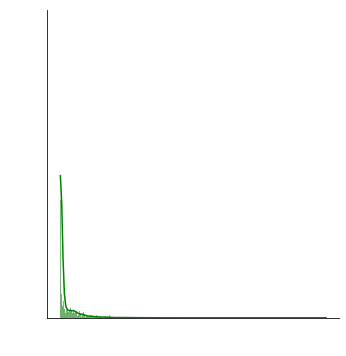

In [20]:
col = 'RoomService'
plt.figure(figsize=(12,8))
sns.displot(data=combined, x=col, color='g', kde=True)
plt.ylim(0,500)
plt.show()

In [21]:
# take log due to skewed distribution
col_num_log = col_num_NA
for col in col_num_log:
    combined[col] = np.log1p(combined[col])

<Figure size 864x576 with 0 Axes>

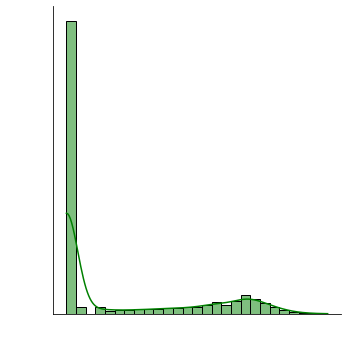

In [22]:
col = 'RoomService'
plt.figure(figsize=(12,8))
sns.displot(data=combined, x=col, color='g', kde=True)
plt.show()

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  float64
 2   Cabin         12808 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Name          12676 non-null  object 
 12  Group         12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


In [24]:
# need to break cabin down, this is screwing it up when the entire cabin isn't available
combined[['deck', 'cabin_num', 'side']] = combined['Cabin'].str.split('/', expand=True)

combined.drop('Cabin', inplace=True, axis=1)

col_cat_na = ['deck', 'cabin_num', 'side']

for col in col_cat_na:
    combined[col] = combined.groupby('Destination')[col].transform(
        lambda x: x.fillna(x.mode()[0]))
combined['cabin_num'] = combined['cabin_num'].astype(int)

In [25]:
# drop name
combined.drop('Name', inplace=True, axis=1)

In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  float64
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  object 
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Group         12970 non-null  object 
 11  deck          12970 non-null  object 
 12  cabin_num     12970 non-null  int64  
 13  side          12970 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.5+ MB


In [27]:
# # one hot encoding
combined = pd.get_dummies(combined, columns=['HomePlanet', 'Destination', 'deck', 'side'])

combined['Group'] = combined['Group'].astype(int)
combined['VIP'] = combined['VIP'].astype(int)

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  float64
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int64  
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   Group                      12970 non-null  int64  
 9   cabin_num                  12970 non-null  int64  
 10  HomePlanet_Earth           12970 non-null  uint8  
 11  HomePlanet_Europa          12970 non-null  uint8  
 12  HomePlanet_Mars            12970 non-null  uint8  
 13  Destination_55 Cancri e    12970 non-null  uint

In [29]:
combined.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,cabin_num,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0.0,3.688879,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0.0,3.218876,0,4.700480,2.302585,3.258097,6.309918,3.806662,2,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,4.077537,1,3.784190,8.182280,0.000000,8.812248,3.912023,3,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,3.526361,0,0.000000,7.157735,5.918894,8.110728,5.267858,3,0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,2.833213,0,5.717028,4.262680,5.023881,6.338594,1.098612,4,1,...,0,0,0,0,0,1,0,0,0,1


### Model design

In [30]:
train = combined.iloc[:train_id.shape[0]]
test = combined.iloc[-test_id.shape[0]:]
train[target] = train_target
print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (8693, 27)
Test shape (4277, 26)


/var/folders/3s/l2m1db5135751grhtk16_j200000gn/T/ipykernel_15615/2658725243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[target] = train_target


In [31]:
# let's split train data into train/test
def train_test_split(data, test_ratio=0.3):
    test_indices = np.random.rand(data.shape[0]) < test_ratio
    return data[~test_indices], data[test_indices]
train_data, test_data = train_test_split(train)
print('{} samples in training, {} samples in testing data'.format(train_data.shape[0], 
                                                            test_data.shape[0]))

6067 samples in training, 2626 samples in testing data


In [32]:
train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,cabin_num,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S,Transported
1,0.0,3.218876,0,4.700480,2.302585,3.258097,6.309918,3.806662,2,0,...,0,0,0,0,1,0,0,0,1,True
5,0.0,3.806662,0,0.000000,6.182085,0.000000,5.676754,0.000000,5,0,...,0,0,0,0,1,0,0,1,0,True
6,0.0,3.295837,0,3.761200,7.339538,1.386294,0.000000,0.000000,6,2,...,0,0,0,0,1,0,0,0,1,True
8,0.0,3.583519,0,0.000000,6.666957,2.890372,5.379897,0.000000,7,3,...,0,0,0,0,1,0,0,0,1,True
9,1.0,2.708050,0,0.000000,0.000000,0.000000,0.000000,0.000000,8,1,...,1,0,0,0,0,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,0.0,3.433987,0,0.000000,8.073715,0.000000,1.098612,5.802118,9275,97,...,0,0,0,0,0,0,0,1,0,True
8688,0.0,3.737670,1,0.000000,8.827615,0.000000,7.404888,4.317488,9276,98,...,0,0,0,0,0,0,0,1,0,False
8689,1.0,2.944439,0,0.000000,0.000000,0.000000,0.000000,0.000000,9278,1499,...,0,0,0,0,0,1,0,0,1,False
8691,0.0,3.496508,0,0.000000,6.956545,0.000000,5.869297,8.082093,9280,608,...,0,0,0,1,0,0,0,0,1,False


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6067 entries, 1 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6067 non-null   float64
 1   Age                        6067 non-null   float64
 2   VIP                        6067 non-null   int64  
 3   RoomService                6067 non-null   float64
 4   FoodCourt                  6067 non-null   float64
 5   ShoppingMall               6067 non-null   float64
 6   Spa                        6067 non-null   float64
 7   VRDeck                     6067 non-null   float64
 8   Group                      6067 non-null   int64  
 9   cabin_num                  6067 non-null   int64  
 10  HomePlanet_Earth           6067 non-null   uint8  
 11  HomePlanet_Europa          6067 non-null   uint8  
 12  HomePlanet_Mars            6067 non-null   uint8  
 13  Destination_55 Cancri e    6067 non-null   uint8

Model: Decision Tree

In [34]:
dt_classifier = DecisionTreeClassifier()

In [35]:
# Define a parameter grid for grid search
param_grid = {
    'max_depth': np.arange(1, 11),  # Vary the max depth from 1 to 10
    'max_leaf_nodes': np.arange(2, 21),  # Vary the max leaf nodes from 2 to 20
}

# Perform grid search with cross-validation, 5-folds, 5 subset for accuracy validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(train_data.iloc[:, :-1], train_data[target])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [36]:
# Get the best parameters from grid search
best_params = grid_search.best_params_
best_params

{'max_depth': 7, 'max_leaf_nodes': 19}

In [37]:
# Train a decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                            max_leaf_nodes=best_params['max_leaf_nodes'])
best_dt_classifier.fit(train_data.iloc[:, :-1], train_data[target])

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=19)

In [38]:
# Make predictions on the test set
y_pred = best_dt_classifier.predict(test_data.iloc[:, :-1])

In [39]:
# Calculate accuracy on the test set
accuracy = accuracy_score(test_data[target], y_pred)
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 0.781035795887281
